## x_train (pure images from dataset)

20
20
(20, 512, 512, 3)
uint8


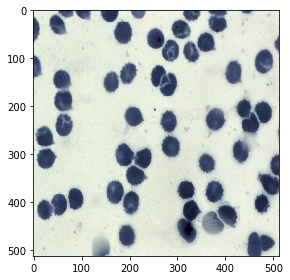

In [1]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/mydata7'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images)) #20
print(len(training_masks))
x_train = np.zeros((len(training_images), row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)

# # y_train (pure masks from dataset)

uint8


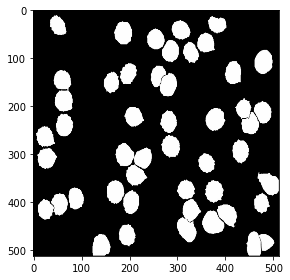

In [2]:

y_train = np.zeros((len(training_masks), row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])

# Augmentation

In [3]:
import albumentations as A

transform = A.Compose([
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=1),
    #A.RandomRotate90(p=1),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=7, always_apply=True, p=1.5),
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5, always_apply=True, p=0.5),
    A.GaussNoise (var_limit=(10.0, 50.0), mean=0, always_apply=True, p=0.5)
])

# aug_x_train (Augmented images from dataset)
# aug_y_train (Augmented masks from dataset)

In [4]:
import os
import numpy as np
from skimage.io import imread, imshow
train_dir = '../input/mydata7/train'
new_images = os.listdir(train_dir)
new_images.sort()
new_training_image = new_images[1::2]
new_training_mask = new_images[::2]
aug_x_train = np.zeros((len(new_training_image), 1200, 1600, 3), dtype=np.uint8)
aug_y_train = np.zeros((len(new_training_mask), 1200, 1600, 3), dtype=np.uint8)
#print(aug_x_train.shape)
count = 0
for x in range(len(new_training_image)):
    image1 = imread(os.path.join(train_dir, new_training_image[x]))  
    mask1 = imread(os.path.join(train_dir, new_training_mask[x]))
    transformed = transform(image=image1, mask=mask1)
    #print(transformed['image'].shape)
    aug_x_train[count] = transformed['image']
    aug_y_train[count] = transformed['mask']
    count += 1
print(aug_x_train.shape)
print(aug_y_train.shape)


(20, 1200, 1600, 3)
(20, 1200, 1600, 3)


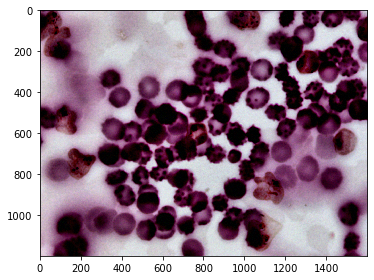

In [5]:
imshow(aug_x_train[19])

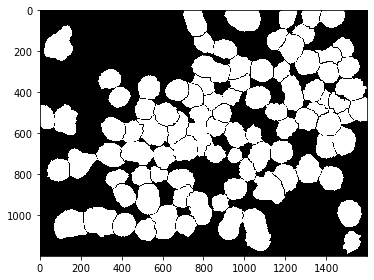

In [6]:
imshow(aug_y_train[19])

# Augmented images + masks saved on cwd for inspection

In [7]:
from skimage.io import imsave
pred_dir = './new_preds'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for x in range(len(aug_x_train)):
    imsave(os.path.join(pred_dir, '0' + str(x) + '_image' + '.png'), aug_x_train[x])
    imsave(os.path.join(pred_dir, '0' + str(x) + '_mask'  + '.jpg'), aug_y_train[x])
    

In [8]:
meow = os.listdir('./new_preds')
meow.sort()
meow
aug_train_image = meow[::2] 
#new_train
aug_train_mask = meow[1::2]

total_train_images = training_images + aug_train_image
total_train_images

['00a02700-2ea2-4590-9e15-ffc9160fd3de.png',
 '00c8364b-8c85-4502-bcfe-64736fe76815.png',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.png',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.png',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.png',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.png',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.png',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.png',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.png',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.png',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.png',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.png',
 '0d098413-6911-4535-b70a-3c3effd8cf49.png',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.png',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.png',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.png',
 '0da07970-3146-479c-8a07-f61ed32814a9.png',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.png',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.png',
 '00_image.png',
 '010_image.png',
 '011_image.png',
 '012_image.png',
 '013_image.png',
 '014_image

In [9]:
total_train_masks = training_masks + aug_train_mask
total_train_masks

['00a02700-2ea2-4590-9e15-ffc9160fd3de.jpg',
 '00c8364b-8c85-4502-bcfe-64736fe76815.jpg',
 '00d04a90-80e5-4bce-9511-1b64eabb7a47.jpg',
 '0a3b53c7-e7ab-4135-80aa-fd2079d727d6.jpg',
 '0a747cb3-c720-4572-a661-ab5670a5c42e.jpg',
 '0a7bfa8a-ee52-4f7a-b9c5-2919ecfa93ef.jpg',
 '0ab56f9a-846d-49e2-a617-c6cc477fdfad.jpg',
 '0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.jpg',
 '0b04ec46-5119-4cda-8c35-c4e5b6f0eed0.jpg',
 '0b923ab7-ebff-4079-a4bb-af7da89f374e.jpg',
 '0ca25c88-457f-4f03-bbc1-98fb6663f1d1.jpg',
 '0ceb4539-5c4c-487d-9826-452a88b5d537.jpg',
 '0d095f3a-9243-472b-90b4-0ce8309e778c.jpg',
 '0d098413-6911-4535-b70a-3c3effd8cf49.jpg',
 '0d2aba33-6920-4001-bd54-59fe0bf9f50e.jpg',
 '0d3c2521-da55-4df5-bf06-56b3bd4fb2fc.jpg',
 '0d7bf56f-3b5a-40bd-971c-2ca33dd89b2c.jpg',
 '0da07970-3146-479c-8a07-f61ed32814a9.jpg',
 '0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.jpg',
 '0dcca702-a4ef-4fb3-a940-9c0c140b21c7.jpg',
 '00_mask.jpg',
 '010_mask.jpg',
 '011_mask.jpg',
 '012_mask.jpg',
 '013_mask.jpg',
 '014_mask.jpg',

# total_x_train (pure images + augmented images)

In [10]:
total_x_train = np.zeros((len(training_images) + len(new_training_image), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata7/train'
c = 0
d = 0 
for x in total_train_images:
    if c< len(training_images):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_x_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_x_train[c] = resize(aug_x_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

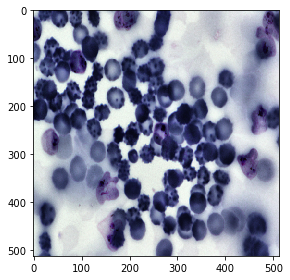

In [11]:
imshow(total_x_train[19])

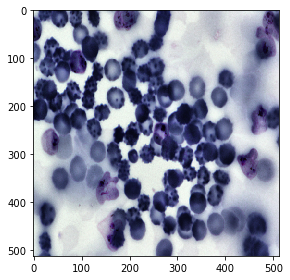

In [12]:
imshow(x_train[19])

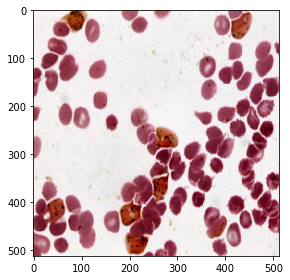

In [13]:
imshow(total_x_train[38])

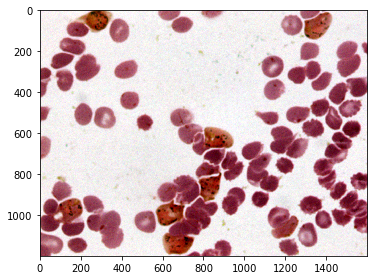

In [14]:
imshow(aug_x_train[18])

# total_y_train (pure masks + augmented masks)

In [15]:
total_y_train = np.zeros((len(training_masks)  + len(new_training_mask), row, columns, 3), dtype=np.uint8)
t_path = '../input/mydata7/train'
c = 0
d = 0 
for x in total_train_masks:
    if c< len(training_masks):
        img = imread(os.path.join(t_path, x))
        img = resize(img, (row, columns), mode='constant', preserve_range=True)
        total_y_train[c] = img
        c += 1
    else: 
        #img2 = imread(os.path.join('./new_preds', x))
        #img2 = resize(img2, (512, 512), mode='constant', preserve_range=True)
        #total_x_train[c] = img2
        #c += 1
        total_y_train[c] = resize(aug_y_train[d], (row, columns), mode='constant', preserve_range=True)
        c += 1
        d += 1

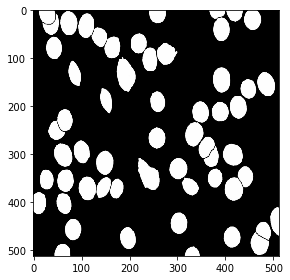

In [16]:
imshow(total_y_train[14])

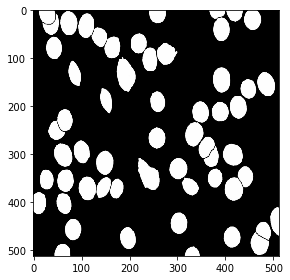

In [17]:
imshow(y_train[14])

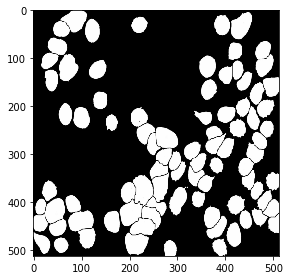

In [18]:
imshow(total_y_train[38])

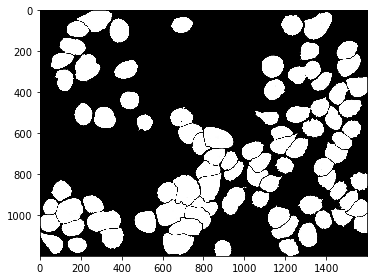

In [19]:
imshow(aug_y_train[18])

In [20]:
print(total_x_train.shape)
print(total_y_train.shape)
print(total_x_train.dtype)
print(total_y_train.dtype)

(40, 512, 512, 3)
(40, 512, 512, 3)
uint8
uint8


# Important

In [21]:
total_y_train = total_y_train.astype('bool')
print(total_y_train.dtype)

bool


In [22]:
''''
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread, imshow
from tensorflow import keras
data_path = '../input/data12'

row = 512
columns = 512

train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
images.sort()

training_images = images[1::2]
training_masks = images[::2] 
print(len(training_images))
print(len(training_masks))
x_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
index = 0
for x in training_images:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_train[index] = image
    index += 1
print(x_train.shape)
#x_train = x_train / 255
#x_train = x_train.astype('float32')
imshow(x_train[0])
print(x_train.dtype)
'''

"'\nimport os\nimport numpy as np\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\n%matplotlib inline\nfrom skimage.transform import resize\nfrom skimage.io import imread, imshow\nfrom tensorflow import keras\ndata_path = '../input/data12'\n\nrow = 512\ncolumns = 512\n\ntrain_data_path = os.path.join(data_path, 'train')\nimages = os.listdir(train_data_path)\nimages.sort()\n\ntraining_images = images[1::2]\ntraining_masks = images[::2] \nprint(len(training_images))\nprint(len(training_masks))\nx_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\nindex = 0\nfor x in training_images:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n   # image.resize((128,128,1))\n    x_train[index] = image\n    index += 1\nprint(x_train.shape)\n#x_train = x_train / 255\n#x_train = x_train.astype('float32')\nimshow(x_train[0])\nprint(x_train.dtype)\n"

In [23]:
'''
y_train = np.zeros((20, row, columns, 3), dtype=np.uint8)
#p = os.path.join(train_data_path, training_masks[0])
#i = imread(p)
#k = resize(i, (128, 128))
#imshow(k)

index = 0
for x in training_masks:
    path = os.path.join(train_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
    #image.resize((128,128,1))
    y_train[index] = image
    index += 1
y_train.shape  
type(y_train)
#y_train = y_train / 255
#y_train = y_train.astype('float32')
print(y_train.dtype)
imshow(y_train[0])
'''

"\ny_train = np.zeros((20, row, columns, 3), dtype=np.uint8)\n#p = os.path.join(train_data_path, training_masks[0])\n#i = imread(p)\n#k = resize(i, (128, 128))\n#imshow(k)\n\nindex = 0\nfor x in training_masks:\n    path = os.path.join(train_data_path, x)\n    image = imread(path)\n    image = resize(image, (row, columns), mode='constant', preserve_range=True)\n    #image.resize((128,128,1))\n    y_train[index] = image\n    index += 1\ny_train.shape  \ntype(y_train)\n#y_train = y_train / 255\n#y_train = y_train.astype('float32')\nprint(y_train.dtype)\nimshow(y_train[0])\n"

# x_test (Images for prediction)

(5, 512, 512, 3)
uint8


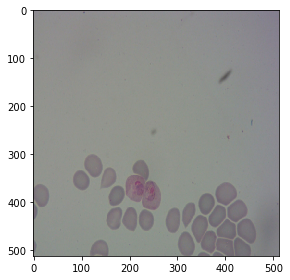

In [24]:
test_data_path = os.path.join(data_path, 'test')
images = os.listdir(test_data_path)
images.sort()
images

testing_images = images[1::2]
testing_masks = images[::2] 

x_test = np.zeros((5, row, columns, 3), dtype=np.uint8)

index = 0
for x in testing_images:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    x_test[index] = image
    index += 1
print(x_test.shape)  
type(x_test)
#x_test = x_test / 255
#x_test = x_test.astype('float32')
print(x_test.dtype)
imshow(x_test[0])

# y_test (Ground truth for prediction)

(5, 512, 512, 3)
float32


/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


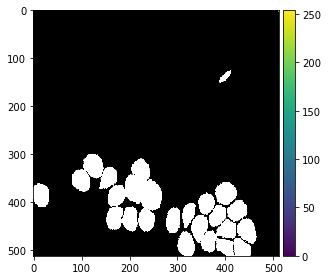

In [25]:
y_test = np.zeros((5, row, columns, 3), dtype=np.float32)

index = 0
for x in testing_masks:
    path = os.path.join(test_data_path, x)
    image = imread(path)
    image = resize(image, (row, columns), mode='constant', preserve_range=True)
   # image.resize((128,128,1))
    #image = image/255
    y_test[index] = image
    index += 1
print(y_test.shape)  
y_test.dtype
type(y_test)
#y_test = y_test / 255
#y_test = y_test.astype('float32')
imshow(y_test[0])
print(y_test.dtype)

# Metrics for training + validation

In [26]:
#y_true = y_test
#y_pred = test_preds
#def dice_coef(y_true, y_pred, smooth=1):
#    y_true_f = K.flatten(y_true)
#    y_pred_f = K.flatten(y_pred)
#    intersection = K.sum(y_true_f * y_pred_f)
#    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


#def dice_coef_loss(y_true, y_pred):
#    return -dice_coef(y_true, y_pred)


#hi = y_test / 255
#hi = K.flatten(hi)
#hi = tf.convert_to_tensor(hi, dtype=None)
#pred = test_preds
#pred = K.flatten(pred)
#pred = tf.convert_to_tensor(test_preds, dtype=None)

def dice_coef(a, b):
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a
  #  hi = tf.dtypes.cast(hi, tf.float32)
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def dice_coef_loss(a, b):
    loss = 1 - dice_coef(a, b)
    return loss

def jaccard_index(a, b):
    hi = a 
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

# Libraries

In [27]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [28]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, add, multiply
from keras.layers import concatenate, core, Dropout
from keras.models import Model
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.core import Lambda
import keras.backend as K

# R2U-net

In [29]:
def attention_block_2d(x, g, inter_channel, data_format='channels_first'):
    # theta_x(?,g_height,g_width,inter_channel)

    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(x)

    # phi_g(?,g_height,g_width,inter_channel)

    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(g)

    # f(?,g_height,g_width,inter_channel)

    f = Activation('relu')(add([theta_x, phi_g]))

    # psi_f(?,g_height,g_width,1)

    psi_f = Conv2D(1, [1, 1], strides=[1, 1], data_format=data_format)(f)

    rate = Activation('sigmoid')(psi_f)

    # rate(?,x_height,x_width)

    # att_x(?,x_height,x_width,x_channel)

    att_x = multiply([x, rate])

    return att_x

In [30]:
def attention_up_and_concate(down_layer, layer, data_format='channels_first'):
    if data_format == 'channels_first':
        in_channel = down_layer.get_shape().as_list()[1]
    else:
        in_channel = down_layer.get_shape().as_list()[3]

    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2), data_format=data_format)(down_layer)

    layer = attention_block_2d(x=layer, g=up, inter_channel=in_channel // 4, data_format=data_format)

    if data_format == 'channels_first':
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=1))
    else:
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))

    concate = my_concat([up, layer])
    return concate

In [31]:
# Recurrent Residual Convolutional Neural Network based on U-Net (R2U-Net)
def rec_res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1], padding='same', data_format='channels_first'):
    
    if data_format == 'channels_first':
        input_n_filters = input_layer.get_shape().as_list()[1]
    else:
        input_n_filters = input_layer.get_shape().as_list()[3]

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(
            input_layer)
    else:
        skip_layer = input_layer

    layer = skip_layer
    for j in range(2):

        for i in range(2):
            if i == 0:

                layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(layer)
                if batch_normalization:
                    layer1 = BatchNormalization()(layer1)
                layer1 = Activation('relu')(layer1)
            layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(add([layer1, layer]))
            if batch_normalization:
                layer1 = BatchNormalization()(layer1)
            layer1 = Activation('relu')(layer1)
        layer = layer1

    out_layer = add([layer, skip_layer])
    return out_layer

In [32]:
#Attention R2U-Net
def att_r2_unet(img_w, img_h, n_label, data_format='channels_first'):
    inputs = Input((3, img_w, img_h))
    x = inputs
    depth = 4
    features = 64
    skips = []
    for i in range(depth):
        x = rec_res_block(x, features, data_format=data_format)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format=data_format)(x)

        features = features * 2

    x = rec_res_block(x, features, data_format=data_format)

    for i in reversed(range(depth)):
        features = features // 2
        x = attention_up_and_concate(x, skips[i], data_format=data_format)
        x = rec_res_block(x, features, data_format=data_format)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)
    
        
    opt = keras.optimizers.Adam(learning_rate=0.001)
    
    #model.compile(optimizer='adam', loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[dice_coef, jaccard_index])
    #model.compile(optimizer=Adam(lr=1e-6), loss=[dice_coef_loss], metrics=['accuracy', dice_coef])
    return model

In [33]:
model = att_r2_unet(512, 512, 3)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 512, 512) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 512, 512) 256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 512, 512) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 512, 512) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

# Training

# Input reshaped (channels first)

In [34]:
print(total_x_train.shape)
r_total_x_train = total_x_train.reshape((40, 3, 512, 512))
print(r_total_x_train.shape)

(40, 512, 512, 3)
(40, 3, 512, 512)


# Input reshaped (channels first)

In [35]:
print(total_y_train.shape)
r_total_y_train = total_y_train.reshape((40, 3, 512, 512))
print(r_total_y_train.shape)

(40, 512, 512, 3)
(40, 3, 512, 512)


In [36]:
#print(x_train.shape)
#r_x_train = x_train.reshape((20, 3, 512, 512))
#print(r_x_train.shape)
#print(y_train.shape)
#r_y_train = y_train.reshape((20, 3, 512, 512))
#print(r_x_train.shape)

In [37]:
print(x_train.shape)
print(y_train.shape)
filepath = "./model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min' )
#mode='min'
callbacks_list = [checkpoint]
#earlystopper,
history = model.fit(r_total_x_train, r_total_y_train, validation_split=0.2, batch_size=1, epochs=20, callbacks=callbacks_list)



(20, 512, 512, 3)
(20, 512, 512, 3)
Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 163.4057 - dice_coef: 0.3392 - jaccard_index: 0.2158
Epoch 00001: val_loss improved from inf to 24.70624, saving model to ./model.h5
32/32 [==============================] - 16s 485ms/step - loss: 163.4057 - dice_coef: 0.3392 - jaccard_index: 0.2158 - val_loss: 24.7062 - val_dice_coef: 0.4090 - val_jaccard_index: 0.2673
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 23.6788 - dice_coef: 0.4919 - jaccard_index: 0.3319
Epoch 00002: val_loss improved from 24.70624 to 16.20170, saving model to ./model.h5
32/32 [==============================] - 15s 479ms/step - loss: 23.6788 - dice_coef: 0.4919 - jaccard_index: 0.3319 - val_loss: 16.2017 - val_dice_coef: 0.4918 - val_jaccard_index: 0.3334
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 18.5296 - dice_coef: 0.4844 - jaccard_index: 0.3289
Epoch 00003: val_loss improved from 16.20170 to 13.76807, sav

# Plotting history

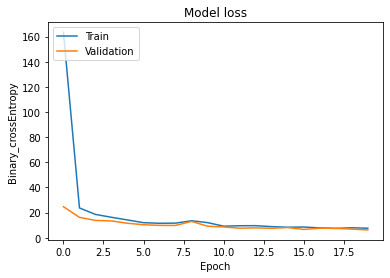

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Binary_crossEntropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

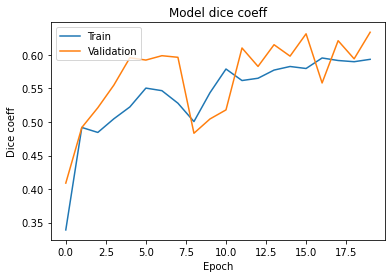

In [39]:
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('Model dice coeff')
plt.ylabel('Dice coeff')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

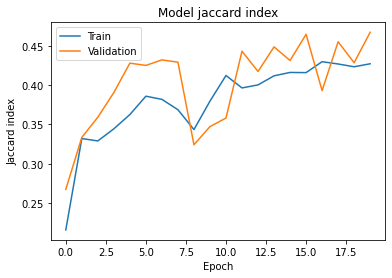

In [40]:
plt.plot(history.history['jaccard_index'])
plt.plot(history.history['val_jaccard_index'])
plt.title('Model jaccard index')
plt.ylabel('Jaccard index')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing

# Test reshaped (channels first)

In [41]:
print(x_test.shape)
r_x_test = x_test.reshape((5, 3, 512, 512))
print(r_x_test.shape)

(5, 512, 512, 3)
(5, 3, 512, 512)


In [42]:
#print(y_test.shape)
#r_y_test = x_test.reshape((5, 3, 512, 512))
#print(r_y_test.shape)

In [43]:
#from keras.models import load_model
#model = load_model('./assets')
model.load_weights('./model.h5')

test_preds = model.predict(r_x_test)
print(test_preds.shape)
print(type(test_preds))

(5, 3, 512, 512)
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
(5, 3, 512, 512)
float32


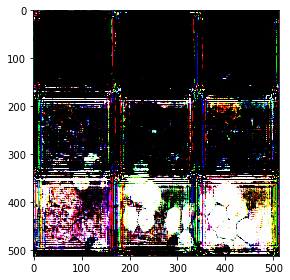

In [44]:
print(type(test_preds))
print(test_preds.shape)
print(test_preds.dtype)
#print(test_preds[0])
imshow(test_preds[0].reshape(512, 512, 3))


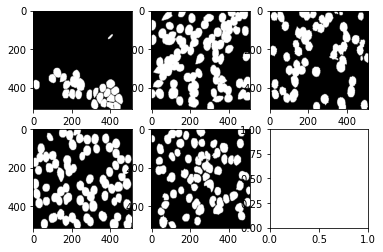

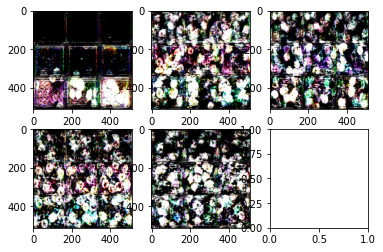

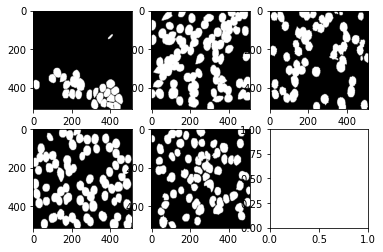

In [45]:
from skimage.io import imshow_collection
imshow_collection(test_preds.reshape(5, 512, 512, 3))
imshow_collection(y_test)

# Evaluating Individual Dice-Co efficient
# Metrics for individual evaluation

In [46]:
def dice_coef2(a, b):
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def jaccard_index2(a, b):
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

float32
float32
Dice Co-efficient:  tf.Tensor(0.51929796, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.35071066, shape=(), dtype=float32)


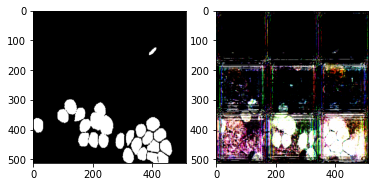

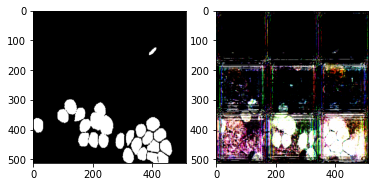

In [47]:
print(y_test[0].dtype)
print(test_preds[0].dtype)
i = y_test[0]
j = test_preds[0]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.6561863, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.48830155, shape=(), dtype=float32)


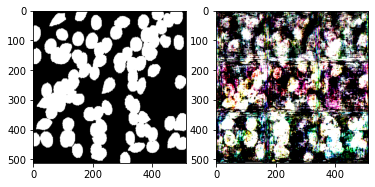

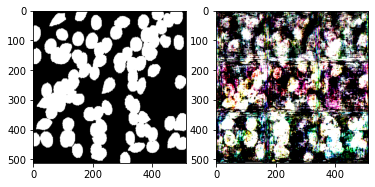

In [48]:
print(y_test[1].dtype)
print(test_preds[1].dtype)
i = y_test[1]
j = test_preds[1]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.55012125, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.37942573, shape=(), dtype=float32)


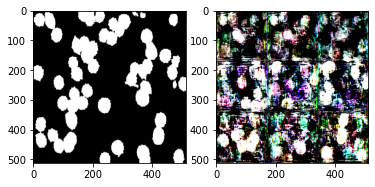

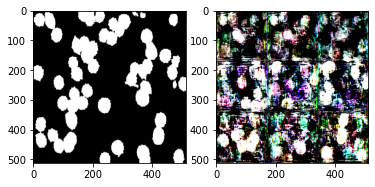

In [49]:
print(y_test[2].dtype)
print(test_preds[2].dtype)
i = y_test[2]
j = test_preds[2]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.626376, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.45600247, shape=(), dtype=float32)


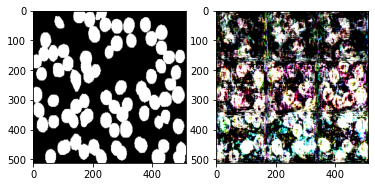

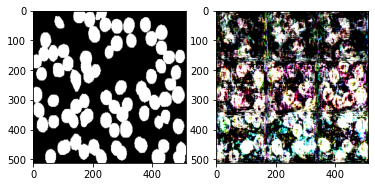

In [50]:
print(y_test[3].dtype)
print(test_preds[3].dtype)
i = y_test[3]
j = test_preds[3]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

float32
float32
Dice Co-efficient:  tf.Tensor(0.57404804, shape=(), dtype=float32)
Jaccard-index:  tf.Tensor(0.4025718, shape=(), dtype=float32)


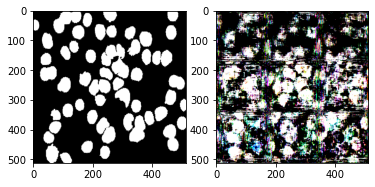

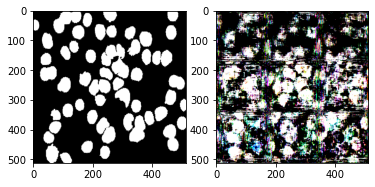

In [51]:
print(y_test[4].dtype)
print(test_preds[4].dtype)
i = y_test[4]
j = test_preds[4]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j.reshape((512, 512, 3))
imshow_collection(x)

# Average Test Dice Co-efficient, Jaccard index

In [52]:
#dice_list = np.array(len(test_preds))
#jaccard_list = np.array(len(test_preds))
avg_dice = 0
avg_jaccard = 0
for x in range(len(test_preds)):
    i = y_test[x]
    j = test_preds[x]
    avg_dice = avg_dice + tf.get_static_value(dice_coef2(i,j))
    avg_jaccard = avg_jaccard + tf.get_static_value(jaccard_index2(i,j))
    
#print(dice_list.dtype)
#print(type(dice_list))
#print(dice_list)
#print(jaccard_list)
#avg_dice = tf.get_static_value(K.sum(dice_list)) / tf.get_static_value(tf.size(dice_list))
#avg_jaccard = tf.get_static_value(K.sum(jaccard_list)) / tf.get_static_value(tf.size(jaccard_list))
print('Average Test Dice co-efficent: ', avg_dice/len(test_preds))
print('Average Test Jaccrad Index: ', avg_jaccard/len(test_preds))
    

Average Test Dice co-efficent:  0.585205900669098
Average Test Jaccrad Index:  0.41540244221687317


In [53]:
history

# Highest & Lowest

In [54]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))
print('Highest training dice coefficient: ', max(history.history['dice_coef']))
print('Highest validation dice coefficient: ', max(history.history['val_dice_coef']))
print('Highest training jaccrad index: ', max(history.history['jaccard_index']))
print('Highest validation jaccard index: ', max(history.history['val_jaccard_index']))

Lowest training loss:  7.422561168670654
Lowest validation loss:  6.219221591949463
Highest training dice coefficient:  0.5954122543334961
Highest validation dice coefficient:  0.6337628960609436
Highest training jaccrad index:  0.4296640157699585
Highest validation jaccard index:  0.467117041349411
